<a href="https://colab.research.google.com/github/EmreCibikci/COMPUTER-PR-CE-PRED-CT-ON-W-TH-PYTHON/blob/main/Online_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/onlinefoods.csv")

In [ ]:
df =df.drop(columns="Unnamed: 12")

In [ ]:
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive


### Education vs Gender

<Axes: xlabel='Gender'>

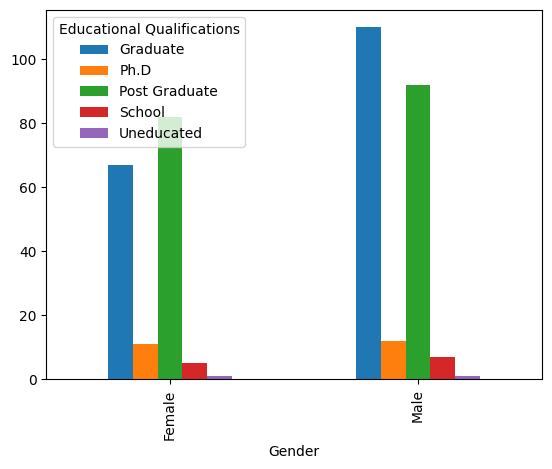

In [ ]:
df.groupby(['Gender', 'Educational Qualifications']).size().unstack().plot(kind='bar')

### Monthly Income vs Educational Qualifications

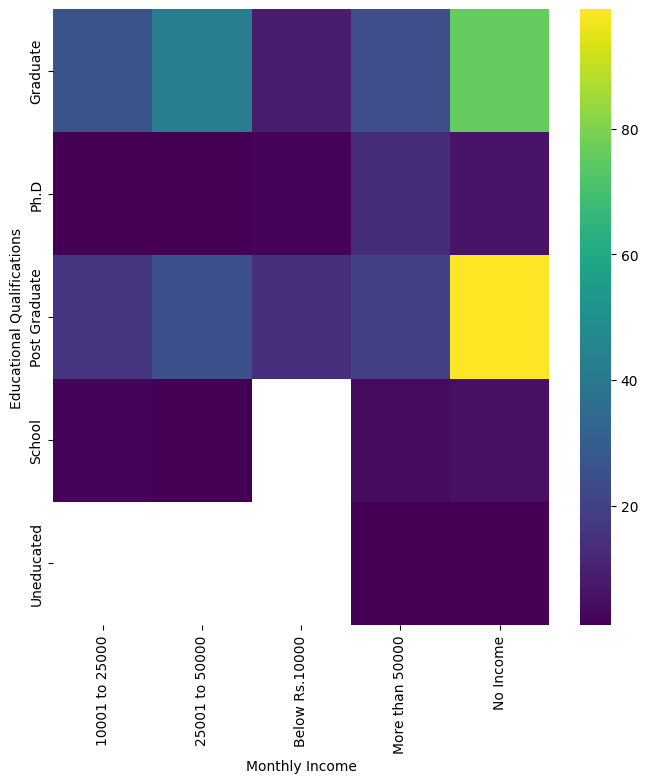

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Educational Qualifications'].value_counts()
    for x_label, grp in df.groupby('Monthly Income')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Monthly Income')
_ = plt.ylabel('Educational Qualifications')

<ipython-input-5-084361ce4a05>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='Monthly Income', inner='stick', palette='Dark2')


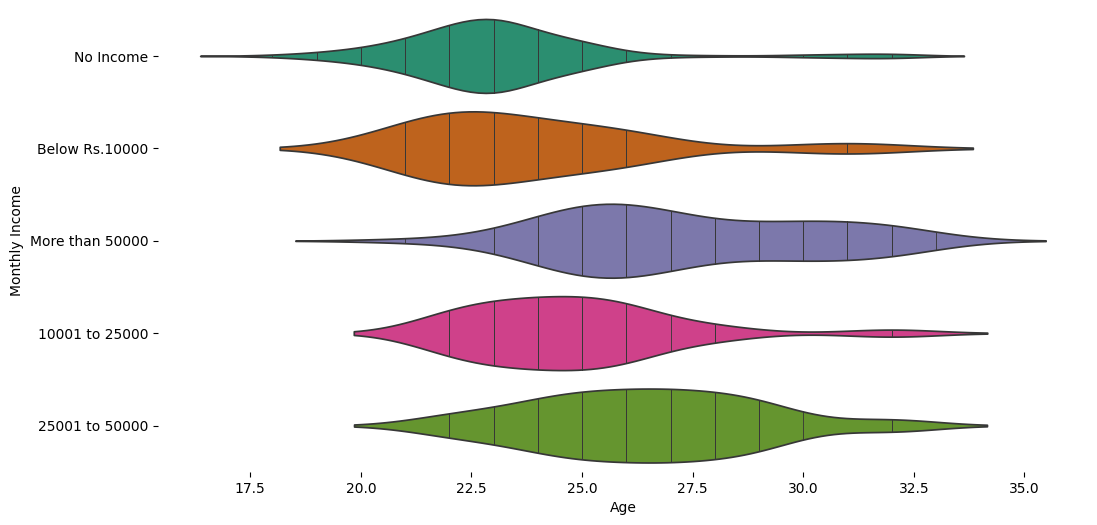

In [ ]:
# @title Monthly Income vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Monthly Income'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Monthly Income', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [ ]:
df.loc[df['Monthly Income'] == '10001 to 25000', 'Monthly Income'] = 17500
df.loc[df['Monthly Income'] == '25001 to 50000', 'Monthly Income'] = 37500
df.loc[df['Monthly Income'] == 'Below Rs.10000', 'Monthly Income'] = 10000
df.loc[df['Monthly Income'] == 'More than 50000', 'Monthly Income'] = 50000
df.loc[df['Monthly Income'] == 'No Income', 'Monthly Income'] = 0


In [ ]:
df['Monthly Income'] = df['Monthly Income'].astype(int)


In [ ]:
pd.DataFrame(df.groupby('Marital Status')['Monthly Income'].mean().sort_values(ascending=False))

,Monthly Income
Marital Status,
Married,34884.259259
Prefer not to say,30625.000000
Single,9664.179104


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Monthly Income'), df['Monthly Income'], test_size=0.2, random_state=42)


In [ ]:
numerical_columns = [0, 5, 6, 7, 8]
cat_nominal = [1, 2, 3]
cat_ordinal = [5, 9, 10]

In [ ]:
handle_numerical = Pipeline(steps=[
    ("numeric", SimpleImputer(strategy="mean"))
])

handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('nominal', handle_nominal, cat_nominal),
    ('ordinal', handle_ordinal, cat_ordinal)
])

In [ ]:
model = LinearRegression()
pipe = make_pipeline(preprocessing,model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numeric',
                                                                   SimpleImputer())]),
                                                  [0, 5, 6, 7, 8]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [1, 2, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [5, 9, 10])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6679.056589923826
Mean Squared Error (MSE): 86780623.09970023
R-squared (R2) Score: 0.7568063975409598


#  part two for new online food project

we gonna use different model to predict deployment of a model to predict whether a person gives positive or negative feedback

In [ ]:
# import data
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/onlinefoods.csv")

In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [ ]:
df = df.drop(columns="Unnamed: 12")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [ ]:
cat_columns = ["Gender","Marital Status","Occupation","Educational Qualifications","Output"]
df_encoded = pd.get_dummies(df, columns=cat_columns)

In [ ]:
df_encoded.loc[df['Monthly Income'] == '10001 to 25000', 'Monthly Income'] = 17500
df_encoded.loc[df['Monthly Income'] == '25001 to 50000', 'Monthly Income'] = 37500
df_encoded.loc[df['Monthly Income'] == 'Below Rs.10000', 'Monthly Income'] = 10000
df_encoded.loc[df['Monthly Income'] == 'More than 50000', 'Monthly Income'] = 50000
df_encoded.loc[df['Monthly Income'] == 'No Income', 'Monthly Income'] = 0

df_encoded.loc[df["Feedback"] == "Positive","Feedback"] = True
df_encoded.loc[df["Feedback"] == "Negative","Feedback"] = False

In [ ]:
df_encoded['Monthly Income'] = df_encoded['Monthly Income'].astype(int)
df_encoded["Feedback"] = df_encoded["Feedback"].astype(bool)

In [ ]:
df_encoded.head()

,Age,Monthly Income,Family size,latitude,longitude,Pin code,Feedback,Gender_Female,Gender_Male,Marital Status_Married,...,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes
0,20,0,4,12.9766,77.5993,560001,True,True,False,False,...,False,False,True,False,False,True,False,False,False,True
1,24,10000,3,12.9770,77.5773,560009,True,True,False,False,...,False,False,True,True,False,False,False,False,False,True
2,22,10000,3,12.9551,77.6593,560017,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True
3,22,0,6,12.9473,77.5616,560019,True,True,False,False,...,False,False,True,True,False,False,False,False,False,True
4,22,10000,4,12.9850,77.5533,560010,True,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       388 non-null    int64  
 1   Monthly Income                            388 non-null    int64  
 2   Family size                               388 non-null    int64  
 3   latitude                                  388 non-null    float64
 4   longitude                                 388 non-null    float64
 5   Pin code                                  388 non-null    int64  
 6   Feedback                                  388 non-null    bool   
 7   Gender_Female                             388 non-null    bool   
 8   Gender_Male                               388 non-null    bool   
 9   Marital Status_Married                    388 non-null    bool   
 10  Marital Status_Prefer not to say      

In [ ]:
X = df_encoded.drop("Feedback",axis=1)
y = df_encoded["Feedback"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#RandomForest Regression model


In [ ]:
#RandomForest Regression model
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train,train_preds)
print("train_set_accuracy : ", train_acc)

test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test,test_preds)
print("test_set_accuracy :", test_acc)

print("Classification Report\n")
print(classification_report(y_test,test_preds))

print("Confusion Matrix Report\n")
print(confusion_matrix(y_test,test_preds))


train_set_accuracy :  1.0
test_set_accuracy : 1.0
Classification Report

              precision    recall  f1-score   support

        True       1.00      1.00      1.00        78

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

Confusion Matrix Report

[[78]]


In [ ]:
print("mae : ",mean_absolute_error(y_test,test_preds))
print("mse : ",mean_squared_error(y_test,test_preds))
print("r2 : ",r2_score(y_test,test_preds))

mae :  0.0
mse :  0.0
r2 :  1.0


In [ ]:
#RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
train_predictions = clf.predict(X_train)
train_acc = accuracy_score(y_train,train_predictions)
print("train_accuracy : ", train_acc)

test_predictions = clf.predict(X_test)
test_acc = accuracy_score(y_test,test_predictions)
print("test_accuracy",test_acc)

print("Classification Report")
print(classification_report(y_test,test_predictions))

print("Confusion matrix")
print(confusion_matrix(y_test,test_predictions))

train_accuracy :  1.0
test_accuracy 1.0
Classification Report
              precision    recall  f1-score   support

        True       1.00      1.00      1.00        78

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78

Confusion matrix
[[78]]


hmm something gone wrong.. models accuracy are 1 and it's wrong.

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X,y,cv=5))
print(cross_val_score(clf,X,y,cv=50))

[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
